# Oppgave 3

# 3.2

Sannsynligheten for å finne en partikkel i en posisjon x med potensiell energi $V(x)$ er 
$P(x)=Ze^{-\beta V(x)}$, 
der $\beta=\frac{1}{k_bT}$ hvor $k_b$ er Boltzmanns konstant og T er temperaturen. Partisjonsfunksjonen $Z$ summerer over de ulike energitilstandene i et system, $Z=\sum_{i=1}^{\infty}e^{-\beta V(x)}$. 
Sannsynligheten for å finne en gitt partikkel med energi $E_i$ blir dermed 
$\pi_i = Z^{-1} e^{-\beta E_i}$.

Sannsynligheten for at en partikkel går til høyre, venstre eller står i ro kan beregnes ut i fra dette. Partisjonsfunksjonen for et slikt system blir

$Z=e^{-\beta V(x_0-1)}+e^{-\beta V(x_0)}+e^{-\beta V(x_0-1)}$,

der $x_0$ er startposisjonen til partikkelen. Sannsynligheten for å gå til høyre, $P^{+}$, blir da

$P^{+}=Z^{-1}e^{-\beta V(x_0 +1)} = \frac{e^{-\beta V(x_0 +1)}}{e^{-\beta V(x_0 -1)}+e^{-\beta V(x_0)}+e^{-\beta V(x)_0 + 1}} = \frac{1}{e^{\beta V(x_0 +1)}(e^{-\beta V(x_0 -1)}+e^{-\beta V(x_0)}+e^{-\beta V(x_0 -1)})}$.

$P^{+}=\frac{1}{e^{-\beta (V(x_0 -1)-V(x_0 +1)} + e^{-\beta (V(x_0)-V(x_0 +1))}}$

Tilsvarende utregning gir at sannsynligheten for at partikkelen står i ro, $P^{0}$ eller går til venstre, $P^{-}$, blir henholdsvis

$P^{0}=\frac{1}{e^{-\beta (V(x_0 -1)-V(x_0)} + e^{-\beta (V(x_0 +1)-V(x_0))}}$

og

$P^{-}=\frac{1}{e^{-\beta (V(x_0 +1)-V(x_0 -1)} + e^{-\beta (V(x_0)-V(x_0 -1))}}$.

# Oppgave 4

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
from scipy import special 
from matplotlib import rc

Definerer konstanter og potensialer

In [15]:
T = 273.15 #[K]
k_B = 1.38*10**(-23) #[J/K]
B = 1/k_B*T
Bk = 0.01
k= Bk/B #[J]


def V4_1(x):
    return k

def V4_2(x):
    return k*x

def V4_3(x):
    v = k*((x/20)+np.sin(x/5))
    return v

def V4_4(x):
    return k*x**2
    

Definerer sannsynligheter

In [16]:
def ppluss(V,x_0):
    p = 1/(1 + np.exp(-B*(V(x_0 -1)-V(x_0+1))) + np.exp(-B*(V(x_0)-V(x_0+1))))
    return p

def p0(V,x_0):
    p = 1/(1 + np.exp(-B*(V(x_0 -1)-V(x_0))) + np.exp(-B*(V(x_0+1)-V(x_0))))
    return p

def pminus(V,x_0):
    p = 1/(1 + np.exp(-B*(V(x_0 +1)-V(x_0-1))) + np.exp(-B*(V(x_0)-V(x_0-1))))
    return p

Definerer random walk funksjonen

In [18]:
def randomWalk(V, antall_partikler, antall_steg, startpos):
    posisjoner = np.zeros(antall_partikler)
    #Lager en ditctionary hvor alle de nødvendige hoppsannsynlighetene er regnet ut.
    #Disse verdiene hentes frem hver gang en partikkel hopper, heller enn at de må regnes ut på nytt hver gang.
    hoppsannsynlighet = {}
    for i in range(-antall_steg, antall_steg):
        hoppsannsynlighet[i] = [pminus(V, i), p0(V, i), ppluss(V, i)]
    for p in range(0,antall_partikler):
        pos = startpos
        for s in range (0,antall_steg):
            tilfeldig = random.uniform(0.0,1.0)
            if (tilfeldig <= hoppsannsynlighet[pos][0]):
                pos -= 1
            elif (tilfeldig > (1-hoppsannsynlighet[pos][2])):
                pos += 1
        posisjoner[p] = pos
    return posisjoner


Vekting av elementer i liste

In [19]:
def vekting(array):
    andeler = []
    posisjoner, antall = np.unique(array,return_counts=True)
    for i in range(0,len(antall)):
        andel = antall[i]/len(array)
        andeler.append(andel)
    np.array(posisjoner)
    np.array(andeler)
    return posisjoner, andeler
        

Definerer parametere

In [20]:
antall_partikler = 10000
antall_steg = 200
startpos = 0


# 4.1

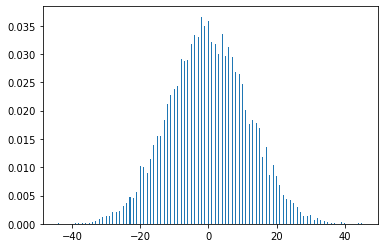

In [23]:
posisjoner = randomWalk(V4_1,antall_partikler,antall_steg,startpos)
x,y = vekting(posisjoner)

plt.bar(x,y,width=0.3)
plt.show()

## Oppgave 5

Definerer konstanter og parametre

In [8]:
alpha = 0.8
T_p = 500   #Antall steg per syklus
h = 1       #Steglengde
N_x = 90    #antall x-verdier i en periode
beta = 1/(1.3806*10**-(23)*298)     #Antar romtemperatur
k = 4.1142*10**-18       #Velger k slik at k*beta = 1000
N_p = 12*N_x    #Partikkeltall
antall_sykluser = 10

In [9]:
def V_2(x, alpha):
    return 2/N_x

#Må passe på at rett x-verdi blir satt inn i funksjonen, ettersom denne kun er gyldig definert
#for [-18, 71] for alpha = 0.8
def V_1(x, alpha):
    if(x<0):
        return(-x/((1-alpha)*N_x))
    else:
        return(x/(alpha*N_x))

def koordinatoversetter(x, alpha):
    x_verdi_til_pot = x
    if x_verdi_til_pot >= N_x + alpha * N_x:
        x_verdi_til_pot -= 2 * N_x
    elif x_verdi_til_pot >= alpha * N_x:
        x_verdi_til_pot -= N_x
    return x_verdi_til_pot


#Finner sannsynlighetene for å bevege seg opp, ned eller bli værende
#Disse funksjonene likner svært på de som er definert over, men de tar også inn en del konstanter, slik at de blir
#lettere å bruke igjen for senere utregninger med andre parametre.
def p_pluss(x, potensial, beta, k, alpha):
    return(1/(1+np.exp(-beta*k*(potensial(x, alpha)-potensial(x+h, alpha)))+np.exp(-beta*k*(potensial(x-h, alpha)-potensial(x+h, alpha)))))

def p_null(x, potensial, beta, k, alpha):
    return (1/(1+np.exp(-beta*k*(potensial(x+h, alpha)-potensial(x, alpha)))+np.exp(-beta*k*(potensial(x-1, alpha)-potensial(x, alpha)))))

def p_minus(x, potensial, beta, k, alpha):
    return (1/(1+np.exp(-beta*k*(potensial(x, alpha)-potensial(x-h, alpha)))+np.exp(-beta*k*(potensial(x+1, alpha)-potensial(x-1, alpha)))))

#Lager startfordeling for main(startfordeling)
def startfordeling1():
    startfordeling1 = np.array([])
    for i in range(2*N_x):
        for e in range(6):
            startfordeling1 = np.append(startfordeling1, [i])
    #Startfordelingen er nå definert med seks partikler i hvert punkt.
    return startfordeling1

def startfordeling2():
    startfordeling2 = np.array([])
    for i in range(int(N_p/2)):
        startfordeling2 = np.append(startfordeling2, 0)
    for j in range(int(N_p/2)):
        startfordeling2 = np.append(startfordeling2, 90)
    #Startfordeling to har halvparten av partiklene i x=0 og den andre halvparten i x=90
    return(startfordeling2)

def plotFordeling(array):
    verdi, antall = np.unique(array, return_counts=True)
    #Verdien vil har antallet på korresponderende plass i antall-lista
    plt.bar(verdi, antall)
#    print(verdi, antall)
    plt.ylim(0, max(antall))
    plt.xlim(-1, 180)
    plt.show()

In [12]:
#Lager startfordeling i main()
def motorProteins(startfordeling, T_p = 500, alpha = 0.8, beta = 1/(1.3806*10**-(23)*298), k = 4.1142*10**-18, antall_sykluser = 10):
    fordeling = startfordeling
    partikkelstrømliste = []   
    hoppsannsynlighetV_1 = {}
    hoppsannsynlighetV_2 = {}
    #x_er heltallsverdier, er viktig at denne løkken ikke skaper feil pga utregninger   
    for i in range(int(round(-(1-alpha)*N_x)), int(alpha*N_x)):
        hoppsannsynlighetV_1[i*h] = [p_minus(i*h, V_1, beta, k, alpha), p_null(i*h, V_1, beta, k, alpha), p_pluss(i*h, V_1, beta, k, alpha)]
    
    for i in range(2*N_x):
        hoppsannsynlighetV_2[i*h] = [p_minus(i*h, V_2, beta, k, alpha), p_null(i*h, V_2, beta, k, alpha), p_pluss(i*h, V_2, beta, k, alpha)]
   
    for e in range(0, 2*antall_sykluser):
        #Alternerer mellom potensial 2 og 1
        if e%2 == 0:
            sannsynligheter = hoppsannsynlighetV_2
        else:
            sannsynligheter = hoppsannsynlighetV_1
        
        #Vi teller opp antall partikkelsteg etter hvert som tiden går, og lagrer dem i variabelen
        #partikkelstrøm
        partikkelstrøm = 0
        
        for i in range(0, T_p):
            for j in range(0, len(fordeling)):
                tall = random.uniform(0, 1)
                if e%2 == 0:
                    #X-verdien til potensial 2 kan stå som den er slik funksjonen er definert
                    x_verdi = fordeling[j]
                else:
                    #Vi trenger kun å transformere x-koordinatet i potensial 1.
                    x_verdi = koordinatoversetter(fordeling[j], alpha)
                if tall <= sannsynligheter[x_verdi][0]:
                    fordeling[j] -= h
                    partikkelstrøm -= 1
                    #Vi må passe på at ingen partikler faller utenfor det gyldige området
                    if fordeling[j] == -1:
                        fordeling[j] = 179
                elif tall >= 1-sannsynligheter[x_verdi][2]:
                    fordeling[j] += h
                    partikkelstrøm += 1
                    #Igjen: Vi må passe på at ingen partikler faller utenfor det gyldige området
                    if fordeling[j] == 180:
                        fordeling[j] = 0
        
#        plotFordeling(fordeling)
        
        partikkelstrømliste.append(partikkelstrøm/(6*2*N_x))
    #Har nå lagret partikkelstrømmen per syklushalvdel. Må behandle den litt slik at den ønskede formen oppstår.
    gjennomsnittsstrøm = []
    for i in range(int(len(partikkelstrømliste)/2)):
        gjennomsnittsstrøm.append((partikkelstrømliste[2*i] + partikkelstrømliste[2*i+1])/(2*T_p))
    return(gjennomsnittsstrøm)


In [13]:
motorProteins(startfordeling1())

[-0.1962962962962963, -26.553703703703704, 1.3824074074074073, -14.21574074074074, -0.3638888888888889, -13.302777777777777, -0.4027777777777778, -13.430555555555555, -0.975925925925926, -14.190740740740742, -0.9361111111111111, -13.397222222222222, 0.06111111111111111, -13.894444444444444, 0.8148148148148148, -14.898148148148149, -0.5083333333333333, -13.991666666666667, 0.37037037037037035, -15.12037037037037]
[-0.02675, -0.012833333333333332, -0.013666666666666666, -0.013833333333333335, -0.015166666666666669, -0.014333333333333333, -0.013833333333333333, -0.014083333333333333, -0.0145, -0.01475]


In [ ]:
motorProteins(startfordeling2())

Definerer den analytiske strømningsfunksjonen $J_{avg}$.

In [ ]:
def J_avg(alfa, N_x, T_p):
    return (N_x/(4*T_p))*(special.erfc((alfa*N_x/2)*np.sqrt(3/T_p)) - special.erfc((((1-alfa)*N_x)/2)*np.sqrt(3/T_p)))

In [ ]:
alpha = np.linspace(0,1)

plt.plot(alpha,J_avg(alpha, 90, 500))
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$J_{avg}$')
plt.title(r"$J_{avg}$ som funksjon av $\alpha$")
plt.show

Når $\alpha=0,5$ vil like mange av partiklene strømme mot høyre og til venstre, derfor vil netto strøm, $J_{avg}$, bli 0. Når $\alpha=0$ vil det være en netto strøm mot høyre, og en tilsvarende strøm mot venstre for $\alpha=1$.

In [ ]:
T_p = np.linspace(80,1500,20) #Partikkelstrøm når tiden endres. 

plt.plot(T_p,J_avg(0.8,10 ,T_p))
plt.xlabel(r"$T_{p}$")
plt.ylabel(r"$J_{avg}$")
plt.title(r"$J_{avg}$ som funksjon av $T_{p}$")
plt.show

Når tiden på diffusjonen av partikler øker vil strømningen gå mot null. 